In [49]:
#INSTALLING SPARK AND PIP PACKAGES
!pip install -q findspark
import os
os.environ["JAVA_HOME"] = "C:/Program Files/Java/jdk1.8.0_231"
os.environ["SPARK_HOME"] = "C:/spark-3.0.0-preview2-bin-hadoop2.7"

In [50]:
#IMPORTING SPARK SESSION
import findspark
findspark.init()
from pyspark.sql import SparkSession 
from pyspark.sql import SQLContext

In [54]:
spark = SparkSession.builder.appName('ml-bank').getOrCreate()

#IMPORTING BANK DATASET AS A SPARK DATA FRAME
df = spark.read.csv('D:\\Data Mining and Machine Learning 2\\Project\\bank.csv', header = True, inferSchema = True) 

#SUMMARISING EACH COLUMN VALUES
df.summary().show()

+-------+------------------+-------+--------+---------+-------+-------+-----+---------+-----+-----------+-----------------+-----------------+------------------+-------------------+--------+-------+
|summary|               age|    job| marital|education|default|housing| loan|  contact|month|day_of_week|         duration|         campaign|             pdays|           previous|poutcome|deposit|
+-------+------------------+-------+--------+---------+-------+-------+-----+---------+-----+-----------+-----------------+-----------------+------------------+-------------------+--------+-------+
|  count|             41188|  41188|   41188|    41188|  41188|  41188|41188|    41188|41188|      41188|            41188|            41188|             41188|              41188|   41188|  41188|
|   mean| 40.02406040594348|   null|    null|     null|   null|   null| null|     null| null|       null|258.2850101971448|2.567592502670681| 962.4754540157328|0.17296299893172767|    null|   null|
| stddev|1

In [55]:
# CHECKING DATA DISTRIBUTION
df.printSchema() 
df.show(5)

root
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- month: string (nullable = true)
 |-- day_of_week: string (nullable = true)
 |-- duration: integer (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- deposit: string (nullable = true)

+---+---------+-------+-----------+-------+-------+----+---------+-----+-----------+--------+--------+-----+--------+-----------+-------+
|age|      job|marital|  education|default|housing|loan|  contact|month|day_of_week|duration|campaign|pdays|previous|   poutcome|deposit|
+---+---------+-------+-----------+-------+-------+----+---------+-----+-----------+--------+-

In [64]:
#Select features
#Select features ('age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'campaign', 'pdays', 'previous', 'poutcome', 'deposit') as df2
df2=df.select('age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'pdays', 'previous', 'poutcome', 'deposit')
df2.show(5)
cols=df2.columns

+---+---------+-------+-----------+-------+-------+----+---------+-----+--------+-----------+-------+
|age|      job|marital|  education|default|housing|loan|  contact|pdays|previous|   poutcome|deposit|
+---+---------+-------+-----------+-------+-------+----+---------+-----+--------+-----------+-------+
| 56|housemaid|married|   basic.4y|     no|     no|  no|telephone|  999|       0|nonexistent|     no|
| 57| services|married|high.school|unknown|     no|  no|telephone|  999|       0|nonexistent|     no|
| 37| services|married|high.school|     no|    yes|  no|telephone|  999|       0|nonexistent|     no|
| 40|   admin.|married|   basic.6y|     no|     no|  no|telephone|  999|       0|nonexistent|     no|
| 56| services|married|high.school|     no|     no| yes|telephone|  999|       0|nonexistent|     no|
+---+---------+-------+-----------+-------+-------+----+---------+-----+--------+-----------+-------+
only showing top 5 rows



In [67]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('SQL').getOrCreate()

#REGISTERING DF2 AS SQL TABLE NAMED "BANK"
df2.registerTempTable("bank") 

#FILTERING UNKNOWN VALUES USING FROM ALL THE COLUMNS USING "AND" "OR" LOGIC USING SPARKSQL
sqlfilter=spark.sql("SELECT * FROM bank WHERE job!='unknown' AND education!='unknown' AND marital!='unknown' AND loan!='unknown' AND (poutcome == 'failure' OR poutcome == 'success')")

In [70]:
#STORING IN NEW VARIABLE TO AVOID 'NONETYPE ERROR'
df2=sqlfilter

In [73]:
#DISPLAYING AND SUMMARIZING NEW DATA FRAME
df2.show()
df2.summary().show()

+---+-------------+--------+-------------------+-------+-------+----+---------+-----+--------+--------+-------+
|age|          job| marital|          education|default|housing|loan|  contact|pdays|previous|poutcome|deposit|
+---+-------------+--------+-------------------+-------+-------+----+---------+-----+--------+--------+-------+
| 40|     services| married|        high.school|     no|    yes|  no|telephone|  999|       1| failure|    yes|
| 36|       admin.| married|  university.degree|     no|    yes|  no|telephone|  999|       1| failure|     no|
| 36|       admin.| married|        high.school|     no|    yes|  no|telephone|  999|       1| failure|    yes|
| 37|       admin.| married|  university.degree|     no|    yes|  no|telephone|    6|       1| success|     no|
| 29|self-employed| married|  university.degree|     no|    yes|  no|telephone|  999|       1| failure|     no|
| 42|   technician|divorced|professional.course|     no|     no|  no| cellular|  999|       1| failure| 

In [101]:
from pyspark.ml.feature import OneHotEncoderEstimator, StringIndexer, VectorAssembler

In [102]:
#SELECTING CATEGORICAL COLUMNS ONLY
categoricalColumns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome']

#CREATING AN EMPTY LIST FOR PIPELINE AND ASSEMBLER
stages = []

In [146]:
#APPLYING FOR LOOP TO INDEX AND ENCODE ALL THE SELECTED COLUMNS
#APPLYING STRING INDEXER TO ALL THE CATEGORICAL COLUMNS AND STORING IT IN A NEW COLUMN WITH +INDEXED
#APPLYING ONE HOT ENCODER TO ALL THE INDEXED COLUMNS AND STORING IT IN A NEW COLUMN WITH +ENCODED

for categoricalCol in categoricalColumns:
    stringIndexer = StringIndexer(inputCol = categoricalCol, outputCol = categoricalCol + '_indexed')
    encoder = OneHotEncoderEstimator(inputCols=[stringIndexer.getOutputCol()], outputCols=[categoricalCol + "_encoded"])
    stages += [stringIndexer, encoder]
    
#INDEXING PREDICTOR COLUMN 'DEPOSIT' AS LABEL AND FEATURES    
label_stringIdx = StringIndexer(inputCol = 'deposit', outputCol = 'label')

#CREATING STAGES FOR BOTH NUMERICAL AND CATEGORICAL COLUMNS
stages += [label_stringIdx]
print(stages)
numericCols = ['age', 'pdays', 'previous']

#ADDING BOTH TO ASSEMBLER
assemblerInputs = [c + "_encoded" for c in categoricalColumns] + numericCols

#VECTORIZING TO CREATE A NEW FEATURES COLUMN WITH INDEXED AND ENCODED VALUES
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
stages += [assembler]

StringIndexer_a2365fbe32b0
[StringIndexer_8d0853c23c50, OneHotEncoderEstimator_7be0d5f2e01d, StringIndexer_9d230f2addb3, OneHotEncoderEstimator_261f3ea12934, StringIndexer_d775528188e0, OneHotEncoderEstimator_14b535701442, StringIndexer_5457f58f19c1, OneHotEncoderEstimator_f9bb60c20fa3, StringIndexer_3abed99eae98, OneHotEncoderEstimator_202aa6af19bf, StringIndexer_32fc62d8ca54, OneHotEncoderEstimator_b764d61f0ab6, StringIndexer_55bba65fee1e, OneHotEncoderEstimator_203ec1fe93e2, StringIndexer_899401e14e8c, VectorAssembler_96977b8029fe, StringIndexer_36fad1ee9abd, OneHotEncoderEstimator_27f920f7b0a5, StringIndexer_070f50676409, OneHotEncoderEstimator_dec696806230, StringIndexer_e8d8d4e3510c, OneHotEncoderEstimator_c6e059c1deff, StringIndexer_769ff408ba51, OneHotEncoderEstimator_27a6b2f05d9b, StringIndexer_3494cd69a8c7, OneHotEncoderEstimator_56e76d39492d, StringIndexer_7f967c4b9cfe, OneHotEncoderEstimator_718436f1c282, StringIndexer_b579aa60e0f9, OneHotEncoderEstimator_877936229a92, Stri

In [104]:
from pyspark.ml import Pipeline

In [105]:
#COMBINING ALL THE STAGES INTO ONE, FITTING DF2 AND TRANSFORMING IT

pipeline = Pipeline(stages = stages)
pipelineModel = pipeline.fit(df2)
df2 = pipelineModel.transform(df2)

In [107]:
#STORING IN NEW VARIABLE TO AVOID 'NONETYPE ERROR'
df3=df2

In [108]:
df3.show(5)

+---+-------------+-------+-----------------+-------+-------+----+---------+-----+--------+--------+-------+-----------+--------------+---------------+---------------+-----------------+-----------------+---------------+---------------+---------------+---------------+------------+-------------+----------------+----------------+-----+--------------------+
|age|          job|marital|        education|default|housing|loan|  contact|pdays|previous|poutcome|deposit|job_indexed|   job_encoded|marital_indexed|marital_encoded|education_indexed|education_encoded|default_indexed|default_encoded|housing_indexed|housing_encoded|loan_indexed| loan_encoded|poutcome_indexed|poutcome_encoded|label|            features|
+---+-------------+-------+-----------------+-------+-------+----+---------+-----+--------+--------+-------+-----------+--------------+---------------+---------------+-----------------+-----------------+---------------+---------------+---------------+---------------+------------+--------

In [109]:
#ADDING ALL THE ORIGINAL COLUMNS TO THE NEW DATA FRAME
selectedCols = ['label', 'features'] + cols
df3 = df3.select(selectedCols)

#DATA DISTRIBUTION OF NEW DATA FRAME
df3.printSchema()

root
 |-- label: double (nullable = false)
 |-- features: vector (nullable = true)
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- deposit: string (nullable = true)



In [110]:
df3.show(5)

+-----+--------------------+---+-------------+-------+-----------------+-------+-------+----+---------+-----+--------+--------+-------+
|label|            features|age|          job|marital|        education|default|housing|loan|  contact|pdays|previous|poutcome|deposit|
+-----+--------------------+---+-------------+-------+-----------------+-------+-------+----+---------+-----+--------+--------+-------+
|  1.0|(26,[3,10,13,18,2...| 40|     services|married|      high.school|     no|    yes|  no|telephone|  999|       1| failure|    yes|
|  0.0|(26,[0,10,12,18,2...| 36|       admin.|married|university.degree|     no|    yes|  no|telephone|  999|       1| failure|     no|
|  1.0|(26,[0,10,13,18,2...| 36|       admin.|married|      high.school|     no|    yes|  no|telephone|  999|       1| failure|    yes|
|  0.0|(26,[0,10,12,18,2...| 37|       admin.|married|university.degree|     no|    yes|  no|telephone|    6|       1| success|     no|
|  0.0|(26,[8,10,12,18,2...| 29|self-employed|ma

In [111]:
#Normalisation

#SELECTING ONLY THE ENCODED COLUMNS TO NORMALIZE  
from pyspark.ml.feature import MinMaxScaler
norm_vars=['features','job_encoded','marital_encoded','loan_encoded','default_encoded','education_encoded','housing_encoded','poutcome_encoded']

#USING MIN-MAX SCALER FUNCTION TO SCLE IT DOWN BETWEEN 0 AND 1
scaler = [MinMaxScaler(inputCol=scale_features ,outputCol=scale_features+ "_SCALED") for scale_features in norm_vars]

#PIPELINING FOR ALL THE COLUMNS AND FITTING IT AGAIN TO DF2
pipeline = Pipeline(stages=scaler)
scalerModel =  pipeline.fit(df2)
scaledData = scalerModel.transform(df2)

In [114]:
#DISPLAYING ALL THE NORMALIZED VALUES
scaledData.show(5)

+---+-------------+-------+-----------------+-------+-------+----+---------+-----+--------+--------+-------+-----------+--------------+---------------+---------------+-----------------+-----------------+---------------+---------------+---------------+---------------+------------+-------------+----------------+----------------+-----+--------------------+--------------------+--------------------+----------------------+-------------------+----------------------+------------------------+----------------------+-----------------------+
|age|          job|marital|        education|default|housing|loan|  contact|pdays|previous|poutcome|deposit|job_indexed|   job_encoded|marital_indexed|marital_encoded|education_indexed|education_encoded|default_indexed|default_encoded|housing_indexed|housing_encoded|loan_indexed| loan_encoded|poutcome_indexed|poutcome_encoded|label|            features|     features_SCALED|  job_encoded_SCALED|marital_encoded_SCALED|loan_encoded_SCALED|default_encoded_SCALED|e

In [115]:
#SELECTING ONLY THE REQUIRED COLUMNS FOR FURTHER SUPERVISED AND UNSUPERVISED LEARNING

df4=scaledData.select('deposit','label','features','job_encoded_SCALED','marital_encoded_SCALED','loan_encoded_SCALED','default_encoded_SCALED','education_encoded_SCALED','housing_encoded_SCALED','poutcome_encoded_SCALED','features_SCALED')

In [116]:
df4.show(5)

+-------+-----+--------------------+--------------------+----------------------+-------------------+----------------------+------------------------+----------------------+-----------------------+--------------------+
|deposit|label|            features|  job_encoded_SCALED|marital_encoded_SCALED|loan_encoded_SCALED|default_encoded_SCALED|education_encoded_SCALED|housing_encoded_SCALED|poutcome_encoded_SCALED|     features_SCALED|
+-------+-----+--------------------+--------------------+----------------------+-------------------+----------------------+------------------------+----------------------+-----------------------+--------------------+
|    yes|  1.0|(26,[3,10,13,18,2...|[0.0,0.0,0.0,1.0,...|             [1.0,0.0]|              [1.0]|             [1.0,0.0]|    [0.0,1.0,0.0,0.0,...|                 [1.0]|                  [1.0]|[0.0,0.0,0.0,1.0,...|
|     no|  0.0|(26,[0,10,12,18,2...|[1.0,0.0,0.0,0.0,...|             [1.0,0.0]|              [1.0]|             [1.0,0.0]|    [1.0,

In [117]:
df2.take(1)

[Row(age=40, job='services', marital='married', education='high.school', default='no', housing='yes', loan='no', contact='telephone', pdays=999, previous=1, poutcome='failure', deposit='yes', job_indexed=3.0, job_encoded=SparseVector(10, {3: 1.0}), marital_indexed=0.0, marital_encoded=SparseVector(2, {0: 1.0}), education_indexed=1.0, education_encoded=SparseVector(6, {1: 1.0}), default_indexed=0.0, default_encoded=SparseVector(2, {0: 1.0}), housing_indexed=0.0, housing_encoded=SparseVector(1, {0: 1.0}), loan_indexed=0.0, loan_encoded=SparseVector(1, {0: 1.0}), poutcome_indexed=0.0, poutcome_encoded=SparseVector(1, {0: 1.0}), label=1.0, features=SparseVector(26, {3: 1.0, 10: 1.0, 13: 1.0, 18: 1.0, 20: 1.0, 21: 1.0, 22: 1.0, 23: 40.0, 24: 999.0, 25: 1.0}))]

In [127]:
#Unsupervised learning
#K-means

# Perform unsupervised learning on df2 with k-means 
# You can use whole df2 as both training and testing data, 
# Evaluate the clustering result using Accuracy.  
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
import matplotlib.pyplot as plt  
from sklearn.datasets.samples_generator import make_blobs 
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.evaluation import BinaryClassificationEvaluator 
%matplotlib inline

In [128]:
from pyspark.ml import Pipeline

#PERFORMING KMEANS CLUSTERING ON DF2 DATA FRAME
#WHOLE DATA IS USED AS TRAINING AND TESTING DATA AS IT IS UNSUPERVISED
kmeans = KMeans().setK(2).setSeed(742).setFeaturesCol("features")
model = kmeans.fit(df4)
predictions = model.transform(df4)
predictions.select('label', 'prediction').show(10)

+-----+----------+
|label|prediction|
+-----+----------+
|  1.0|         0|
|  0.0|         0|
|  1.0|         0|
|  0.0|         1|
|  0.0|         0|
|  0.0|         0|
|  0.0|         0|
|  0.0|         0|
|  0.0|         0|
|  0.0|         0|
+-----+----------+
only showing top 10 rows



In [129]:
#APPLYING KMEANS USING ELBOW METHOD TO GET THE OPTIMAL VALUE OF K TO HELP IN ANALYSIS IN REPORT

kmeans3=KMeans(featuresCol="features",k=3)
kmeans2=KMeans(featuresCol="features",k=2)
model_k3 = kmeans3.fit(df4)
model_k2 = kmeans2.fit(df4)
wssse_k3 = model_k3.computeCost(df4)
wssse_k2 = model_k2.computeCost(df4)
print("With K=3")
print("Within Set Sum of Squared Errors = " + str(wssse_k3))
print('--'*30)
print("With K=2")
print("Within Set Sum of Squared Errors = " + str(wssse_k2))

With K=3
Within Set Sum of Squared Errors = 598139.5340484071
------------------------------------------------------------
With K=2
Within Set Sum of Squared Errors = 817220.0243732648


In [130]:
#APPLYING FOR LOOP FOR REST OF THE VALUES OF K
for k in range(2,9):
    kmeans = KMeans(featuresCol='features_SCALED',k=k)
    models = kmeans.fit(df4)
    wssse = models.computeCost(df4)
    print("With K={}".format(k))
    print("Within Set Sum of Squared Errors = " + str(wssse))
    print('--'*30)

With K=2
Within Set Sum of Squared Errors = 14126.18777183132
------------------------------------------------------------
With K=3
Within Set Sum of Squared Errors = 12746.026791241065
------------------------------------------------------------
With K=4
Within Set Sum of Squared Errors = 11716.132567384975
------------------------------------------------------------
With K=5
Within Set Sum of Squared Errors = 10794.14393627808
------------------------------------------------------------
With K=6
Within Set Sum of Squared Errors = 10718.897757010047
------------------------------------------------------------
With K=7
Within Set Sum of Squared Errors = 10401.822345933444
------------------------------------------------------------
With K=8
Within Set Sum of Squared Errors = 9738.289926510526
------------------------------------------------------------


In [131]:
#FINDING CLUSTER CENTRES FOR THE FIRST KMEANS WE HAD APPLIED TO DF2
centers = model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)

Cluster Centers: 
[2.60687123e-01 2.18725413e-01 1.45292421e-01 1.08575924e-01
 7.73669027e-02 5.03540519e-02 2.72751115e-02 3.75032783e-02
 3.51429321e-02 2.22921584e-02 5.65171781e-01 3.14188303e-01
 3.02648833e-01 2.74586939e-01 1.57094152e-01 1.23524784e-01
 8.60215054e-02 5.58615264e-02 8.76212956e-01 1.23524784e-01
 5.71466037e-01 8.44217152e-01 1.00000000e+00 3.98397587e+01
 9.99000000e+02 1.11723053e+00]
[3.24304539e-01 8.78477306e-02 1.53733529e-01 5.27086384e-02
 7.02781845e-02 1.17862372e-01 7.46705710e-02 1.90336750e-02
 2.34260615e-02 4.68521230e-02 5.33674963e-01 3.68960469e-01
 4.08491947e-01 2.35724744e-01 8.56515373e-02 1.39092240e-01
 9.88286969e-02 3.14787701e-02 9.59004392e-01 4.09956076e-02
 5.62225476e-01 8.47730600e-01 9.00439239e-02 4.19143485e+01
 5.96412884e+00 1.64128843e+00]


In [132]:
#CONVERTING THE PREDICTION AND LABEL DATA FRAME TO PANDAS FOR ACCURACY
import numpy as np
from sklearn.metrics import accuracy_score

#USING TOPANDAS FUNCTION FOR CONVERSION
y_true=predictions.toPandas()
y_pred=predictions.toPandas()

#USING ACCURACY FUNCTION TO FIND ACCURACY
accuracy_score(y_true.label, y_pred.prediction)

0.8123189804981656

In [133]:
#Supervised learning
#SPLITTING NORMALIZED DATA FRAME INTO 70% AND 30% RATIO
train, test = df4.randomSplit([0.7, 0.3], seed = 742)
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))

Training Dataset Count: 3614
Test Dataset Count: 1565


In [134]:
#Logistic Regression Model
#IMPORTING PACKAGES FOR LOGISTIC REGRESSION
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.evaluation import BinaryClassificationEvaluator 

#FITTING A LOGISTIC REGRESSION MODEL TO TRAIN DATA USING NORMALIZED FEATURES
lr = LogisticRegression(featuresCol = 'features_SCALED', labelCol = 'label', maxIter=10)
lrModel = lr.fit(train)

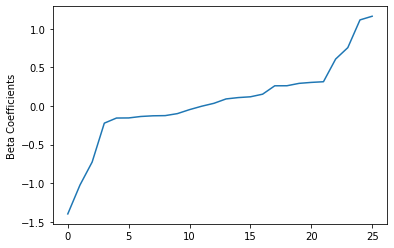

In [135]:
#SORTING AND PLOTTING ALL THE 23 COEFFICIENTS OF THE MODEL
import matplotlib.pyplot as plt
import numpy as np

beta = np.sort(lrModel.coefficients)

#PLOTTING AND LABELLING
plt.plot(beta)
plt.ylabel('Beta Coefficients')
plt.show()

In [136]:
#PRINTING COEFFICIENTS AND INTERCEPT FOR THE MODEL
print(beta)

print("Coefficients: " + str(lrModel.coefficients))
print("Intercept: " + str(lrModel.intercept))

[-1.39614663 -1.02267672 -0.72512915 -0.22177824 -0.15558681 -0.15432261
 -0.13541909 -0.12665974 -0.12426962 -0.09848385 -0.04682312 -0.00259843
  0.03482061  0.0915352   0.10902291  0.11924682  0.15284436  0.26152754
  0.26217363  0.29308308  0.30551333  0.31414624  0.60747594  0.75522659
  1.11399095  1.16148459]
Coefficients: [0.09153519823615562,-0.22177824379774871,0.15284436070349716,-0.09848384784803903,-0.0025984327796556494,0.29308307673636047,0.6074759352568387,-0.7251291490557339,-0.13541909358158008,0.2621736298093767,0.26152753781141114,0.30551333145673015,0.3141462445875301,-0.04682311743615258,-0.12426962031603543,0.10902291049597662,0.03482060751275543,-0.15558680972818614,0.7552265927542142,-0.15432261184692958,-0.1266597440539545,0.11924681569354398,-1.0226767155894743,1.1614845921958123,-1.3961466281603634,1.113990954317301]
Intercept: -1.021097994678477


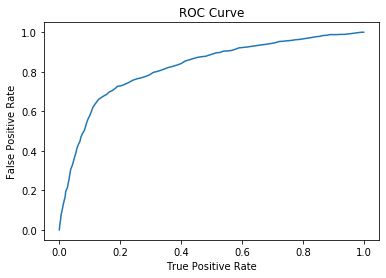

Training set areaUnderROC: 0.8228241231842076


In [137]:
#CALCULATING ROC AND PLOTTING IT
#USING SUMMARY FUNCTION TO GET ALL THE PARAMETERS
trainingSummary = lrModel.summary

roc = trainingSummary.roc.toPandas()
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

print('Training set areaUnderROC: ' + str(trainingSummary.areaUnderROC))

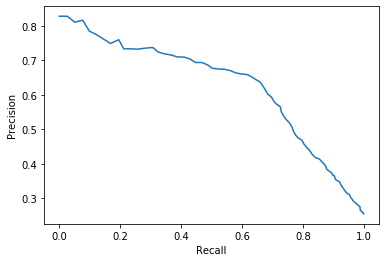

In [138]:
#BETTER THE ROC BETTER THE MODEL
#PLOTTING RECALL VS PRECISION GRAPH
pr = trainingSummary.pr.toPandas()
plt.plot(pr['recall'],pr['precision'])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

In [139]:
#CALCULATING PREDICTION AND PROBABILITY FOR ALL THE FEATURES
predictionsLR = lrModel.transform(test)
predictionsLR.select( 'features','label', 'rawPrediction', 'prediction', 'probability').show(10)

+--------------------+-----+--------------------+----------+--------------------+
|            features|label|       rawPrediction|prediction|         probability|
+--------------------+-----+--------------------+----------+--------------------+
|(26,[0,10,12,18,2...|  0.0|[1.91018416577513...|       0.0|[0.87103983650575...|
|(26,[0,10,12,18,2...|  0.0|[1.86716621791603...|       0.0|[0.86613004463381...|
|(26,[0,10,12,18,2...|  0.0|[1.85282690196299...|       0.0|[0.86445867213545...|
|(26,[0,10,12,18,2...|  0.0|[1.80980895410389...|       0.0|[0.85933878305638...|
|(26,[0,10,12,18,2...|  0.0|[1.80980895410389...|       0.0|[0.85933878305638...|
|(26,[0,10,12,18,2...|  0.0|[1.80980895410389...|       0.0|[0.85933878305638...|
|(26,[0,10,12,18,2...|  0.0|[1.80980895410389...|       0.0|[0.85933878305638...|
|(26,[0,10,12,18,2...|  0.0|[1.80980895410389...|       0.0|[0.85933878305638...|
|(26,[0,10,12,18,2...|  0.0|[1.79546963815085...|       0.0|[0.85759656183502...|
|(26,[0,10,12,18

In [140]:
#USING BINARYCLASS EVALUATOR FOR TEST AREA UNDER ROC CALCULATION
#DEFAULT METRIC FOR BINARY CLASS IS AREA UNDER ROC

from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator()
print('Test Area Under ROC', evaluator.evaluate(predictionsLR))

Test Area Under ROC 0.7907333682556312


In [141]:
#PRINTING ONLY LABEL AND PREDICTION FOR ACCURACY CALCULATION
accdf=predictions.select("label","prediction").show(5)

+-----+----------+
|label|prediction|
+-----+----------+
|  1.0|         0|
|  0.0|         0|
|  1.0|         0|
|  0.0|         1|
|  0.0|         0|
+-----+----------+
only showing top 5 rows



In [142]:
#MULTICLASS EVALUATOR FOR ACCURACY USING PREDICTION AND LABEL COLUMNS
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

my_eval1 = MulticlassClassificationEvaluator(predictionCol='prediction',labelCol='label', metricName='accuracy')
acc = my_eval1.evaluate(predictionsLR)
print("accuracy=%g" %(acc))

accuracy=0.803195


In [143]:
#CALCULATING CONFUSION MATRIX OF THE LR MODEL USING MULTICLASS METRICS
from pyspark.mllib.evaluation import MulticlassMetrics
predandlabel=predictionsLR.select( 'label', 'prediction').rdd
metrics = MulticlassMetrics(predandlabel)
print(metrics.confusionMatrix())

DenseMatrix([[1027.,  185.],
             [ 123.,  230.]])


In [144]:
#METRICS FOR PRECISION, RECALL AND F1SCORE
cm=metrics.confusionMatrix().toArray()
precision=(cm[0][0])/(cm[0][0]+cm[1][0])
recall=(cm[0][0])/(cm[0][0]+cm[0][1])
f1score =((2*precision*recall )/ (precision + recall))

print("Logistic regression:precision,recall,f1score",precision,recall,f1score)

Logistic regression:precision,recall,f1score 0.8930434782608696 0.8473597359735974 0.869602032176122


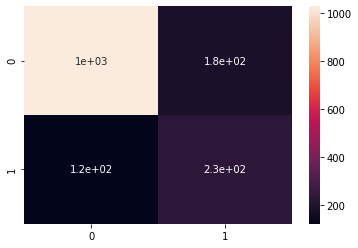

In [145]:
#PLOTTING HEATMAP OF ALL THE METRICS PARAMETERS USING SEABORN PACKAGE
import seaborn as sns
sns.heatmap(cm, annot=True)